# Imports

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import xlsxwriter
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Prepare Data

In [3]:
X_bipolar = np.array([
    [-1, -1],
    [-1, 1],
    [1, -1],
    [1, 1]
])

X_binary = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
]).ravel()

# Learning rate
rates = np.array([.05, .25, .5, 1., 2.])

# Momentum
alphas = np.array([0., .5, 1., ])

print(X_bipolar.shape)
print(X_binary.shape)
print(y.shape)

(4, 2)
(4, 2)
(4,)


In [26]:
def getMLP (X, y, activation="tanh", random=False, r=0.05, alpha=0):
    lastLoss = 1
    while lastLoss > .1:
        mlp = MLPClassifier(
                            solver='sgd',
                            shuffle=random,
                            activation=activation,
                            max_iter=500000,
                            tol=1e-10,
                            hidden_layer_sizes=(2,),
                            momentum=alpha,
                            learning_rate_init=r)
        mlp.fit(X, y)
        lastLoss = np.array(mlp.loss_curve_).min()
    
    print('Score: ', mlp.score(X, y))
    print('Number of iterations: ', mlp.n_iter_)
    print('Loss: ', lastLoss)
    return mlp

def plot(X, y, mlp, r=0.05, alpha=0):
    # Plot - Loss Curve
    losses = mlp.loss_curve_
    plt.plot(losses)
    plt.title("Loss (r = " + str(r) + ", alpha = " + str(alpha) + ")")
    plt.show()
    
    # Plot - Confusion Matris
    fig = ConfusionMatrixDisplay.from_estimator(mlp, X, y)
    fig.figure_.suptitle("Matriz de confusao")
    plt.show()
    
    # Plot - regiao de decisao
    step = .01
    
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    
    Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)
    plt.imshow(Z, cmap=plt.cm.hot)
    plt.axis('off')
    #plt.plot(X[:, 0]*len(xx), X[:, 1]*len(yy), '.')
    plt.show()

In [5]:
labels = ["Execução", "r=0.05", "r=0.25", "r=0.5", "r=1", "r=2"]
media = [ "Média", 0, 0, 0, 0, 0 ]
n_elem=10

### test

In [27]:
mlp = getMLP(X=X_bipolar,y=y)

Score:  1.0
Number of iterations:  310852
Loss:  0.002292229497958531


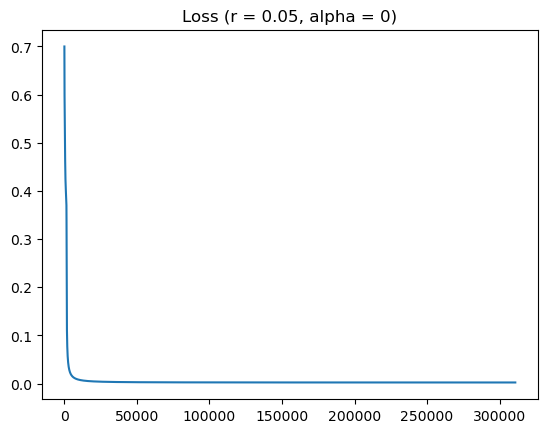

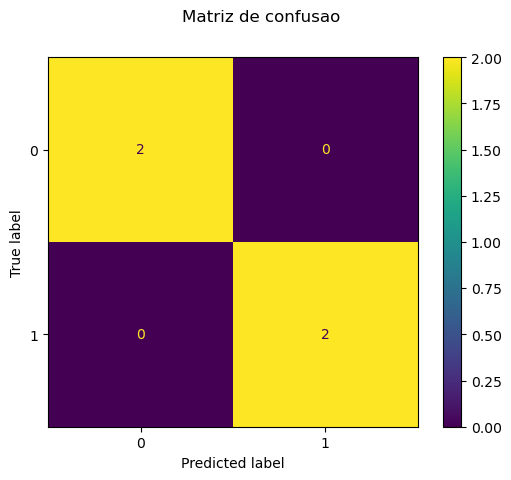

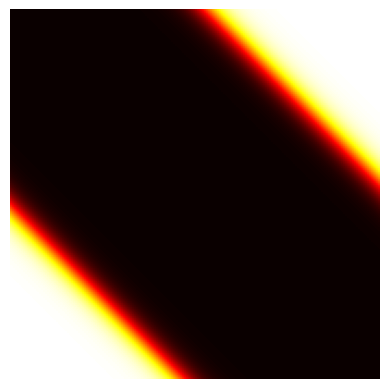

In [28]:
plot(X=X_bipolar,y=y , mlp=mlp)

# Efeito da taxa de aprendizagem


In [5]:
workbook = xlsxwriter.Workbook("results/1.Efeito da taxa de aprendizagem.xlsx")
worksheet = workbook.add_worksheet()
row = 0

worksheet.write(row, 0, "Efeito da taxa de aprendizagem")
row += 2

worksheet.write(row,1, "alpha = 0")
row +=1

worksheet.write_row(row, 1, labels)
row +=1

m = media.copy()

for i in range(1,n_elem + 1):
    worksheet.write(row, 1, i)
    for j in range(len(rates)):
        mlp = getMLP(X=X_bipolar,y=y, r=rates[j], alpha=alphas[0])
        worksheet.write(row, j+2, mlp.n_iter_)
        m[j+1] += mlp.n_iter_

    row+=1

for j in range(len(rates)):
    m[j+1]/=n_elem

worksheet.write_row(row, 1, m)
row +=3

workbook.close()

Score:  1.0
Number of iterations:  306742
Loss:  0.0022918773284996744
Score:  1.0
Number of iterations:  90439
Loss:  0.0022846579058023934
Score:  1.0
Number of iterations:  52498
Loss:  0.002283601282063714
Score:  1.0
Number of iterations:  30639
Loss:  0.0022830449727055373
Score:  1.0
Number of iterations:  17237
Loss:  0.0022827343482823984
Score:  1.0
Number of iterations:  306668
Loss:  0.0022918659512909654
Score:  1.0
Number of iterations:  90688
Loss:  0.0022846696085540635
Score:  1.0
Number of iterations:  52829
Loss:  0.002283612980879643
Score:  1.0
Number of iterations:  30568
Loss:  0.0022830433628733765
Score:  1.0
Number of iterations:  17349
Loss:  0.0022827360493764973
Score:  1.0
Number of iterations:  306139
Loss:  0.0022918186984895094
Score:  1.0
Number of iterations:  91099
Loss:  0.0022846886273742155
Score:  1.0
Number of iterations:  52644
Loss:  0.0022836075885418862
Score:  1.0
Number of iterations:  30917
Loss:  0.002283051595393211
Score:  1.0
Number o

# Efeito da introdução de um termo de momento

### alpha = 0.5

In [9]:
workbook = xlsxwriter.Workbook("results/2.Efeito da introdução de um termo de momento.xlsx")
worksheet = workbook.add_worksheet()
row = 0

worksheet.write(row, 0, "Efeito da taxa de aprendizagem")
row += 2

worksheet.write(row,1, "alpha = 0")
row +=1

worksheet.write_row(row, 1, labels)
row +=1

m = media.copy()

for i in range(1,n_elem + 1):
    worksheet.write(row, 1, i)
    for j in range(len(rates)):
        mlp = getMLP(X=X_bipolar,y=y, r=rates[j], alpha=alphas[1])
        worksheet.write(row, j+2, mlp.n_iter_)
        m[j+1] += mlp.n_iter_

    row+=1

for j in range(len(rates)):
    m[j+1]/=n_elem

worksheet.write_row(row, 1, m)
row +=2

Score:  1.0
Number of iterations:  183052
Loss:  0.002287534519806942
Score:  1.0
Number of iterations:  52774
Loss:  0.002283611356665467
Score:  1.0
Number of iterations:  38354
Loss:  0.0022831331369705587
Score:  1.0
Number of iterations:  17403
Loss:  0.0022827369831958533
Score:  1.0
Number of iterations:  9912
Loss:  0.002282578130886543
Score:  1.0
Number of iterations:  183053
Loss:  0.002287557581395457
Score:  1.0
Number of iterations:  52583
Loss:  0.0022836046692538436
Score:  1.0
Number of iterations:  30488
Loss:  0.0022830419752398793
Score:  1.0
Number of iterations:  17344
Loss:  0.00228273596400715
Score:  1.0
Number of iterations:  10083
Loss:  0.0022825795578555706
Score:  1.0
Number of iterations:  183392
Loss:  0.002287572951159346
Score:  1.0
Number of iterations:  52931
Loss:  0.0022836151250907764
Score:  1.0
Number of iterations:  31076
Loss:  0.002283055162999349
Score:  1.0
Number of iterations:  17734
Loss:  0.002282741790642913
Score:  1.0
Number of itera

### alpha = 1

In [10]:
worksheet.write(row,1, "alpha = 1")
row +=1

worksheet.write_row(row, 1, labels)
row +=1

m = media.copy()

for i in range(1,n_elem + 1):
    worksheet.write(row, 1, i)
    for j in range(len(rates)):
        mlp = getMLP(X=X_bipolar,y=y, r=rates[j], alpha=alphas[2])
        worksheet.write(row, j+2, mlp.n_iter_)
        m[j+1] += mlp.n_iter_

    row+=1

for j in range(len(rates)):
    m[j+1]/=n_elem

worksheet.write_row(row, 1, m)
row +=3

workbook.close()

Score:  1.0
Number of iterations:  95
Loss:  0.003614844787696014
Score:  1.0
Number of iterations:  50
Loss:  0.003358727935991606
Score:  1.0
Number of iterations:  37
Loss:  0.0030783224838683136
Score:  1.0
Number of iterations:  32
Loss:  0.0037850379721670975
Score:  1.0
Number of iterations:  32
Loss:  0.0048862470137912084
Score:  1.0
Number of iterations:  98
Loss:  0.0031104700791611847
Score:  1.0
Number of iterations:  63
Loss:  0.004610953002790264
Score:  1.0
Number of iterations:  48
Loss:  0.005019444255135682
Score:  1.0
Number of iterations:  34
Loss:  0.0035800222792414065
Score:  1.0
Number of iterations:  30
Loss:  0.0034978533646928805
Score:  1.0
Number of iterations:  118
Loss:  0.00563757861691389
Score:  1.0
Number of iterations:  52
Loss:  0.004920802425574026
Score:  1.0
Number of iterations:  43
Loss:  0.0032045497097862486
Score:  1.0
Number of iterations:  31
Loss:  0.0034946832848011663
Score:  1.0
Number of iterations:  28
Loss:  0.004290444051529958
Sc

# Ordem de apresentação aleatória

In [7]:
workbook = xlsxwriter.Workbook("results/3.Ordem de apresentação aleatória.xlsx")
worksheet = workbook.add_worksheet()
row = 0

worksheet.write(row, 0, "Efeito da taxa de aprendizagem")
row += 2

worksheet.write(row,1, "alpha = 0")
row +=1

worksheet.write_row(row, 1, labels)
row +=1

m = media.copy()

for i in range(1,n_elem + 1):
    worksheet.write(row, 1, i)
    for j in range(len(rates)):
        mlp = getMLP(X=X_bipolar,y=y, activation="tanh", random=False, r=rates[j], alpha=alphas[2])
        worksheet.write(row, j+2, mlp.n_iter_)
        m[j+1] += mlp.n_iter_

    row+=1

for j in range(len(rates)):
    m[j+1]/=n_elem

worksheet.write_row(row, 1, m)
row +=3

workbook.close()

Score:  1.0
Number of iterations:  87
Loss:  0.003100518603338812
Score:  1.0
Number of iterations:  65
Loss:  0.00552960099396292
Score:  1.0
Number of iterations:  35
Loss:  0.002985246726565157
Score:  1.0
Number of iterations:  33
Loss:  0.003552794781832803
Score:  1.0
Number of iterations:  26
Loss:  0.0036201099641425005
Score:  1.0
Number of iterations:  101
Loss:  0.004015717650966924
Score:  1.0
Number of iterations:  68
Loss:  0.005691326376285301
Score:  1.0
Number of iterations:  40
Loss:  0.004212774503445127
Score:  1.0
Number of iterations:  32
Loss:  0.0033283064169341747
Score:  1.0
Number of iterations:  25
Loss:  0.0031035711907752453
Score:  1.0
Number of iterations:  110
Loss:  0.004804405165958677
Score:  1.0
Number of iterations:  49
Loss:  0.003874616459822239
Score:  1.0
Number of iterations:  41
Loss:  0.003465615377376044
Score:  1.0
Number of iterations:  33
Loss:  0.004135964610140272
Score:  1.0
Number of iterations:  24
Loss:  0.0034536242909366586
Score

# Codificação binária

In [11]:
workbook = xlsxwriter.Workbook("results/Efeito da taxa de aprendizagem.xlsx")
worksheet = workbook.add_worksheet()
row = 0

worksheet.write(row, 0, "Efeito da taxa de aprendizagem")
row += 2

worksheet.write(row,1, "alpha = 0")
row +=1

worksheet.write_row(row, 1, labels)
row +=1

m = media.copy()

for i in range(1,n_elem + 1):
    worksheet.write(row, 1, i)
    for j in range(len(rates)):
        mlp = getMLP(X=X_binary,y=y, activation="relu", random=False, r=rates[j], alpha=alphas[0])
        worksheet.write(row, j+2, mlp.n_iter_)
        m[j+1] += mlp.n_iter_

    row+=1

for j in range(len(rates)):
    m[j+1]/=n_elem

worksheet.write_row(row, 1, m)
row +=3

workbook.close()

Score:  1.0
Number of iterations:  191683
Loss:  0.0014261738233193205
Score:  1.0
Number of iterations:  27053
Loss:  0.002073399608649427
Score:  1.0
Number of iterations:  19200
Loss:  0.001426299058200278
Score:  1.0
Number of iterations:  9829
Loss:  0.0014249000858361754
Score:  1.0
Number of iterations:  3775
Loss:  0.0020601753802227136
Score:  1.0
Number of iterations:  108597
Loss:  0.0015144063115227705
Score:  1.0
Number of iterations:  38853
Loss:  0.0014251664832667548
Score:  1.0
Number of iterations:  13633
Loss:  0.0020730075122116064
Score:  1.0
Number of iterations:  6787
Loss:  0.0020740782558554523
Score:  1.0
Number of iterations:  4714
Loss:  0.0014282761746978677
Score:  1.0
Number of iterations:  108113
Loss:  0.001512858954087498
Score:  1.0
Number of iterations:  38896
Loss:  0.0014250986545397606
Score:  1.0
Number of iterations:  13361
Loss:  0.002073059009863774
Score:  1.0
Number of iterations:  4168
Loss:  0.0022564706947664635
Score:  1.0
Number of iter